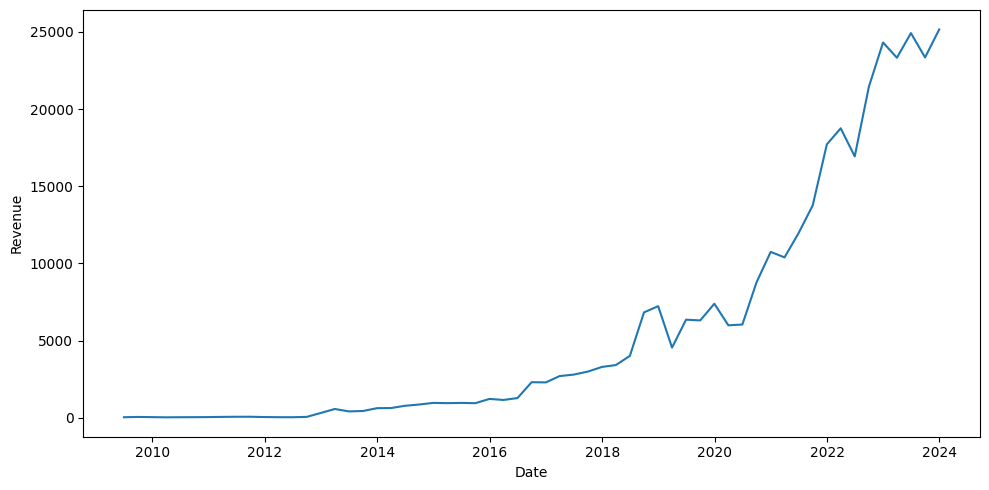

Annual revenue
Monthly benefits


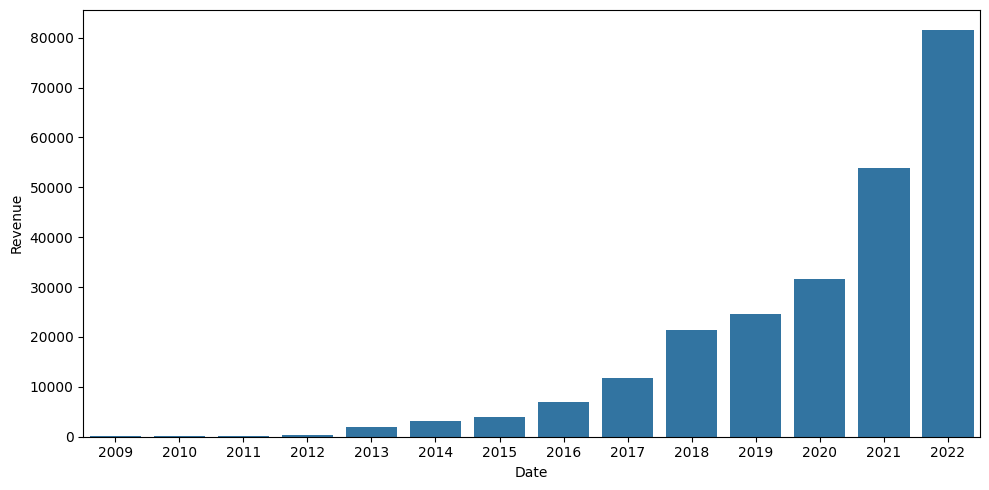

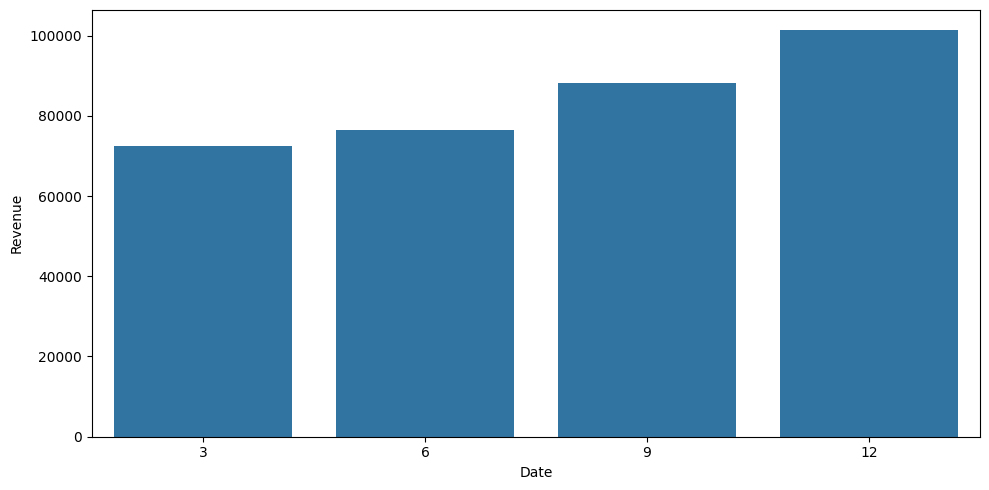

In [7]:
from bs4 import BeautifulSoup
import requests 
from urllib.request import Request, urlopen
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


URL = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

hdr = {'User-Agent': 'Mozilla/5.0'}
req = Request(URL,headers=hdr)
page = urlopen(req)
soup = BeautifulSoup(page, 'html.parser')

tables = soup.find_all("table", {"class":"historical_data_table table"})
#tables = soup.find_all("table", {"class": "historical_data_table table"})
#print(tables)

# Initialize an empty dictionary to store the data
data_dict = {}

# Initialize empty lists to store data
dates = []
revenues = []

# Find all tables
tables = soup.find_all("table", {"class": "historical_data_table table"})

# Iterate through tables to find the one containing "Tesla Quarterly Revenue" in its header
important_table = None
for table in tables:
    th_element = table.find("th", {"colspan": "2", "style": "text-align:center"})
    if th_element and "Tesla Quarterly Revenue" in th_element.text:
        important_table = table
        break

# If the important table is found, extract data and store it in the lists
if important_table:
    # Process the important table
    rows = important_table.find_all("tr")
    for row in rows:
        # Extract data from each row
        cells = row.find_all("td")
        if len(cells) == 2:  # Ensure each row has exactly 2 cells (date and revenue)
            date = cells[0].text.strip()
            revenue = cells[1].text.strip().replace("$", "").replace(",", "")
            if revenue:  # Exclude empty or missing values
                dates.append(date)
                revenues.append(revenue)

# Create DataFrame
df = pd.DataFrame({"Date": dates, "Revenue": revenues})

# Print DataFrame
#print(df)

#Process the DataFrame

tesla_revenue = df[df["Revenue"] != ""]
tesla_revenue.head()

#Store the data in SQLite

connection = sqlite3.connect("Tesla.db")
connection

#cursor = connection.cursor()
#cursor.execute("""CREATE TABLE revenue (Date, Revenue)""")

tesla_tuples = list(tesla_revenue.to_records(index = False))
tesla_tuples[:5]

#cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
#connection.commit()

#Visualize the data

fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype('int')
sns.lineplot(data = tesla_revenue, x = "Date", y = "Revenue")

plt.tight_layout()


plt.show()

#Visualize anual revenue

fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue_yearly = tesla_revenue.groupby(tesla_revenue["Date"].dt.year).sum().reset_index()

sns.barplot(data = tesla_revenue_yearly[tesla_revenue_yearly["Date"] < 2023], x = "Date", y = "Revenue")

print("Annual revenue")
plt.tight_layout()


#Monthly benefit

fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue_monthly = tesla_revenue.groupby(tesla_revenue["Date"].dt.month).sum().reset_index()

sns.barplot(data = tesla_revenue_monthly, x = "Date", y = "Revenue")

plt.tight_layout()

print("Monthly benefits")
plt.show()
